# Build a movie recommendation engine

#### Good Book : https://epdf.pub/recommender-systems-an-introduction.html

<img src='img/reco1.jpg'>

## 3 types of recommendation engines

#### 1. Demographic Filtering
    * No personalized recommendations per user
    * Generalized recommendations
    
#### 2. Content Based Filtering
<img src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/06/Screenshot-from-2018-06-21-10-57-38.png'>

#### 3. Collaborative Filtering
<img src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/05/0o0zVW2O6Rv-LI5Mu1.png'>

In [4]:
import warnings
warnings.filterwarnings('ignore')

### Import Libraries

In [6]:
import pandas as pd
import numpy as np

In [7]:
df1 = pd.read_csv('datasets/tmdb_5000_credits.csv')
df2 = pd.read_csv('datasets/tmdb_5000_movies.csv')

In [8]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [9]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [14]:
df2.drop('title',axis=1,inplace=True)

In [16]:
df1.columns = ['id', 'title', 'cast', 'crew']

df = df2.merge(df1,on='id')

In [17]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,title,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


#### Demographic filtering model

* We need to create some metric / score to rate the movie.

* Calculate movie score

* Score the data according to the scores and recommend best scores to the users.

* Formula : (https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#calculatetop)


    * How do you calculate the rank of movies and TV shows on the Top Rated Movies and Top Rated TV Show lists?
      
      
      The following formula is used to calculate the Top Rated 250 titles. This formula provides a true 'Bayesian estimate', which takes into account the number of votes each title has received, minimum votes required to be on the list, and the mean vote for all titles:

        weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C

        Where:

        R = average for the movie (mean) = (rating)

        v = number of votes for the movie = (votes)

        m = minimum votes required to be listed in the Top Rated list (currently 25,000)

        C = the mean vote across the whole report
        


In [18]:
C =df['vote_average'].mean()
C

6.092171559442011

In [24]:
m = df['vote_count'].quantile(0.9)
m

1838.4000000000015

In [25]:
dff = df.copy().loc[df['vote_count']>=m]
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 481 entries, 0 to 4602
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                481 non-null    int64  
 1   genres                481 non-null    object 
 2   homepage              349 non-null    object 
 3   id                    481 non-null    int64  
 4   keywords              481 non-null    object 
 5   original_language     481 non-null    object 
 6   original_title        481 non-null    object 
 7   overview              481 non-null    object 
 8   popularity            481 non-null    float64
 9   production_companies  481 non-null    object 
 10  production_countries  481 non-null    object 
 11  release_date          481 non-null    object 
 12  revenue               481 non-null    int64  
 13  runtime               481 non-null    float64
 14  spoken_languages      481 non-null    object 
 15  status                

In [26]:
def weighted_rating(x,m=m,C=C):
    V = x['vote_count']
    R = x['vote_average']
    
    return ((R*V/(V+m))+(C*m/(V+m)))

In [27]:
dff['Score'] = df.apply(weighted_rating,axis=1)
dff.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,vote_average,vote_count,title,cast,crew,Score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.346721
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.096368


In [28]:
df = dff.sort_values('Score',ascending=False)
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,vote_average,vote_count,title,cast,crew,Score
1881,25000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 80, ""name...",NaN,278,"[{""id"": 378, ""name"": ""prison""}, {""id"": 417, ""n...",en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,136.747729,"[{""name"": ""Castle Rock Entertainment"", ""id"": 97}]",...,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fear can hold you prisoner. Hope can set you f...,8.5,8205,The Shawshank Redemption,"[{""cast_id"": 3, ""character"": ""Andy Dufresne"", ...","[{""credit_id"": ""52fe4231c3a36847f800b153"", ""de...",8.059258
662,63000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxmovies.com/movies/fight-club,550,"[{""id"": 825, ""name"": ""support group""}, {""id"": ...",en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,146.757391,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...",...,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Mischief. Mayhem. Soap.,8.3,9413,Fight Club,"[{""cast_id"": 4, ""character"": ""The Narrator"", ""...","[{""credit_id"": ""55731b8192514111610027d7"", ""de...",7.939256
65,185000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 28, ""name...",http://thedarkknight.warnerbros.com/dvdsite/,155,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight,Batman raises the stakes in his war on crime. ...,187.322927,"[{""name"": ""DC Comics"", ""id"": 429}, {""name"": ""L...",...,152.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Why So Serious?,8.2,12002,The Dark Knight,"[{""cast_id"": 35, ""character"": ""Bruce Wayne"", ""...","[{""credit_id"": ""55a0eb4a925141296b0010f8"", ""de...",7.920020
3232,8000000,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 80, ""n...",NaN,680,"[{""id"": 396, ""name"": ""transporter""}, {""id"": 14...",en,Pulp Fiction,"A burger-loving hit man, his philosophical par...",121.463076,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...",...,154.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Just because you are a character doesn't mean ...,8.3,8428,Pulp Fiction,"[{""cast_id"": 2, ""character"": ""Vincent Vega"", ""...","[{""credit_id"": ""52fe4269c3a36847f801caa3"", ""de...",7.904645
96,160000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 53, ""nam...",http://inceptionmovie.warnerbros.com/,27205,"[{""id"": 1014, ""name"": ""loss of lover""}, {""id"":...",en,Inception,"Cobb, a skilled thief who commits corporate es...",167.583710,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,148.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Your mind is the scene of the crime.,8.1,13752,Inception,"[{""cast_id"": 1, ""character"": ""Dom Cobb"", ""cred...","[{""credit_id"": ""56e8462cc3a368408400354c"", ""de...",7.863239


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

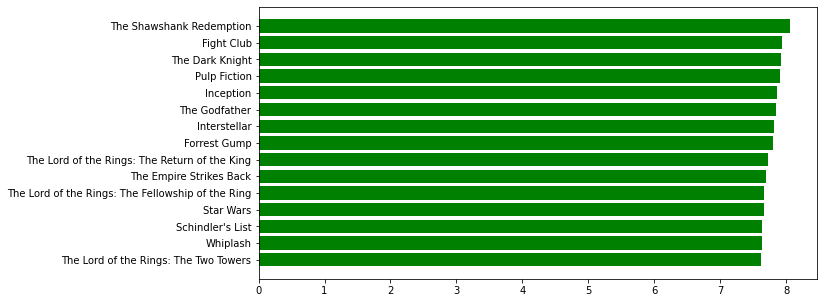

In [31]:
score = df.sort_values('Score',ascending=False)
plt.figure(figsize=(10,5))
plt.barh(score['title'].head(15),score['Score'].head(15),align='center',color='green')
plt.gca().invert_yaxis()

## Content Based Filtering

<img src='img/reco3.jpg'>

In [32]:
df1.columns = ['id', 'title', 'cast', 'crew']

df = df2.merge(df1,on='id')

In [33]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,title,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [34]:
df['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [36]:
df[df['original_title']=='Interstellar']

'Interstellar chronicles the adventures of a group of explorers who make use of a newly discovered wormhole to surpass the limitations on human space travel and conquer the vast distances involved in an interstellar voyage.'

In [39]:
df['overview'][239]

'Dr. Ryan Stone, a brilliant medical engineer on her first Shuttle mission, with veteran astronaut Matt Kowalsky in command of his last flight before retiring. But on a seemingly routine spacewalk, disaster strikes. The Shuttle is destroyed, leaving Stone and Kowalsky completely alone-tethered to nothing but each other and spiraling out into the blackness of space. The deafening silence tells them they have lost any link to Earth and any chance for rescue. As fear turns to panic, every gulp of air eats away at what little oxygen is left. But the only way home may be to go further out into the terrifying expanse of space.'

In [40]:
df['overview'][96]

'Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: "inception", the implantation of another person\'s idea into a target\'s subconscious.'

#### Text Vectorization

## Tf IDF vectorizer - Term Frequency Inverse Document Frequency vectorizer

Vector = matrixed or mathematical representation of unstructured / semi-structured / structured data

* Speed = 15 km/hr ------ Scalar (only magnitude)
* Velocity = 15 km/hr ----- Vector (both magnitude and direction)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

df['overview'] = df['overview'].fillna('')

tfidfmatrix = tfidf.fit_transform(df['overview'])

In [47]:
tfidfmatrix

<4803x20978 sparse matrix of type '<class 'numpy.float64'>'
	with 125840 stored elements in Compressed Sparse Row format>

In [48]:
tfidfmatrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<img src='img/reco4.jpg'>

In [49]:
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

cosinesim = linear_kernel(tfidfmatrix,tfidfmatrix)

In [51]:
dfsim = pd.DataFrame(cosinesim)
dfsim

,0,1,2,3,4,5,6,7,8,9,...,4793,4794,4795,4796,4797,4798,4799,4800,4801,4802
0,1.000000,0.000000,0.000000,0.024995,0.000000,0.030353,0.000000,0.037581,0.000000,0.000000,...,0.000000,0.000000,0.029175,0.042176,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
1,0.000000,1.000000,0.000000,0.000000,0.033369,0.000000,0.000000,0.022676,0.000000,0.000000,...,0.000000,0.000000,0.006895,0.000000,0.000000,0.000000,0.0,0.021605,0.000000,0.000000
2,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.030949,0.024830,0.000000,...,0.027695,0.000000,0.000000,0.000000,0.017768,0.000000,0.0,0.014882,0.000000,0.000000
3,0.024995,0.000000,0.000000,1.000000,0.010433,0.005145,0.012601,0.026954,0.020652,0.133740,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.033864,0.042752,0.022692
4,0.000000,0.033369,0.000000,0.010433,1.000000,0.000000,0.009339,0.037407,0.000000,0.017148,...,0.012730,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.006126,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011481,0.027528,0.000000,...,0.000000,0.011071,0.000000,0.000000,0.003788,1.000000,0.0,0.000000,0.008276,0.000000
4799,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
4800,0.000000,0.021605,0.014882,0.033864,0.006126,0.018289,0.000000,0.000000,0.029639,0.015648,...,0.011035,0.000000,0.015509,0.018922,0.000000,0.000000,0.0,1.000000,0.016091,0.007019
4801,0.000000,0.000000,0.000000,0.042752,0.000000,0.005611,0.009274,0.000000,0.035356,0.005222,...,0.000000,0.011861,0.000000,0.000000,0.000000,0.008276,0.0,0.016091,1.000000,0.011717


In [52]:
indices = pd.Series(df.index,index=df['title'])

In [53]:
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

### Create a get_recommendation function

1. get index movie title

2. get list of cosine similarities

3. convert cosine similarities into a list of tuples (index of movie, similarity score)

4. sort list in descending

5. get top 10 elements of the list

6. first element of list movie itself, so we will skip it

7. show 1:11

In [59]:
def get_recommendations(title, cosinesimmatrix = cosinesim):
    
    # 1. get index of movie title
    idx = indices[title] #0
    
    # convert cosine similarities into a list of tuples (index of movie, similarity score)
    sim_scores = enumerate(cosinesimmatrix[idx])
    
    # sort list in descending
    sim_scores = sorted(sim_scores,key=lambda x:x[1], reverse=True)
    
    # top 10 elements
    sim_scores = sim_scores[1:11]
    
    # get movie indices
    movie_indices = [i[0] for i in sim_scores]
    
    # return top 10
    return df['title'].iloc[movie_indices]

In [69]:


sorted(enumerate(cosinesim[0]),key=lambda x:x[1], reverse=True)[1:11]

[(3604, 0.18681001056212054),
 (2130, 0.17015105119162663),
 (634, 0.13230696630317224),
 (1341, 0.12393264590871879),
 (529, 0.12248959164893028),
 (1610, 0.10469903037615635),
 (311, 0.10091388184065117),
 (847, 0.09799623121705058),
 (775, 0.09447938436890335),
 (2628, 0.09313854469530522)]

In [70]:
get_recommendations('Avatar')

3604                       Apollo 18
2130                    The American
634                       The Matrix
1341            The Inhabited Island
529                 Tears of the Sun
1610                           Hanna
311     The Adventures of Pluto Nash
847                         Semi-Pro
775                        Supernova
2628             Blood and Chocolate
Name: title, dtype: object

In [71]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [72]:
df[df['original_title']=='The Dark Knight Rises']

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,title,cast,crew
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31295,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."


In [77]:
df['overview'][3]

"Following the death of District Attorney Harvey Dent, Batman assumes responsibility for Dent's crimes to protect the late attorney's reputation and is subsequently hunted by the Gotham City Police Department. Eight years later, Batman encounters the mysterious Selina Kyle and the villainous Bane, a new terrorist leader who overwhelms Gotham's finest. The Dark Knight resurfaces to protect a city that has branded him an enemy."

In [78]:
df['overview'][65]

'Batman raises the stakes in his war on crime. With the help of Lt. Jim Gordon and District Attorney Harvey Dent, Batman sets out to dismantle the remaining criminal organizations that plague the streets. The partnership proves to be effective, but they soon find themselves prey to a reign of chaos unleashed by a rising criminal mastermind known to the terrified citizens of Gotham as the Joker.'

In [79]:
df['genres'][3]

'[{"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]'

In [80]:
df['keywords'][3]

'[{"id": 849, "name": "dc comics"}, {"id": 853, "name": "crime fighter"}, {"id": 949, "name": "terrorist"}, {"id": 1308, "name": "secret identity"}, {"id": 1437, "name": "burglar"}, {"id": 3051, "name": "hostage drama"}, {"id": 3562, "name": "time bomb"}, {"id": 6969, "name": "gotham city"}, {"id": 7002, "name": "vigilante"}, {"id": 9665, "name": "cover-up"}, {"id": 9715, "name": "superhero"}, {"id": 9990, "name": "villainess"}, {"id": 10044, "name": "tragic hero"}, {"id": 13015, "name": "terrorism"}, {"id": 14796, "name": "destruction"}, {"id": 18933, "name": "catwoman"}, {"id": 156082, "name": "cat burglar"}, {"id": 156395, "name": "imax"}, {"id": 173272, "name": "flood"}, {"id": 179093, "name": "criminal underworld"}, {"id": 230775, "name": "batman"}]'

In [81]:
df['crew'][3]

'[{"credit_id": "52fe4781c3a36847f81398c3", "department": "Sound", "gender": 2, "id": 947, "job": "Original Music Composer", "name": "Hans Zimmer"}, {"credit_id": "52fe4781c3a36847f8139899", "department": "Production", "gender": 0, "id": 282, "job": "Producer", "name": "Charles Roven"}, {"credit_id": "52fe4781c3a36847f813991b", "department": "Writing", "gender": 2, "id": 525, "job": "Screenplay", "name": "Christopher Nolan"}, {"credit_id": "52fe4781c3a36847f8139865", "department": "Directing", "gender": 2, "id": 525, "job": "Director", "name": "Christopher Nolan"}, {"credit_id": "52fe4781c3a36847f8139893", "department": "Production", "gender": 2, "id": 525, "job": "Producer", "name": "Christopher Nolan"}, {"credit_id": "52fe4781c3a36847f8139915", "department": "Writing", "gender": 2, "id": 525, "job": "Story", "name": "Christopher Nolan"}, {"credit_id": "52fe4781c3a36847f813990f", "department": "Writing", "gender": 2, "id": 527, "job": "Screenplay", "name": "Jonathan Nolan"}, {"credit_

In [82]:
df['cast'][3]

'[{"cast_id": 2, "character": "Bruce Wayne / Batman", "credit_id": "52fe4781c3a36847f8139869", "gender": 2, "id": 3894, "name": "Christian Bale", "order": 0}, {"cast_id": 8, "character": "Alfred Pennyworth", "credit_id": "52fe4781c3a36847f8139881", "gender": 2, "id": 3895, "name": "Michael Caine", "order": 1}, {"cast_id": 5, "character": "James Gordon", "credit_id": "52fe4781c3a36847f8139875", "gender": 2, "id": 64, "name": "Gary Oldman", "order": 2}, {"cast_id": 3, "character": "Selina Kyle / Catwoman", "credit_id": "52fe4781c3a36847f813986d", "gender": 1, "id": 1813, "name": "Anne Hathaway", "order": 3}, {"cast_id": 4, "character": "Bane", "credit_id": "52fe4781c3a36847f8139871", "gender": 2, "id": 2524, "name": "Tom Hardy", "order": 4}, {"cast_id": 15, "character": "Miranda Tate", "credit_id": "52fe4781c3a36847f813988d", "gender": 1, "id": 8293, "name": "Marion Cotillard", "order": 5}, {"cast_id": 6, "character": "Blake", "credit_id": "52fe4781c3a36847f8139879", "gender": 2, "id": 2

In [83]:
from ast import literal_eval

features = ['cast','crew','keywords','genres']

In [84]:
for feature in features:
    df[feature] = df[feature].apply(literal_eval)

In [89]:
df['crew'][0]

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [88]:
df[features].to_csv('df-features.csv')

* 3 top actors

* director

* related genres and keywords

### Extract director

In [91]:
def get_director(x):
    for i in x:
        if i['job']=='Director':
            return i['name']
        
    return np.nan


### Top 3 values (actor, genre, crew)

In [92]:
def get3(x):
    if isinstance(x,list):
        names = [i['name'] for i in x]
        
        # checking if more than 3 elements
        if len(names)>3:
            names = names[:3]
            
        return names
    return []

In [93]:
df['genres'][0]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [94]:
df['Director'] = df['crew'].apply(get_director)

In [96]:
features = ['cast','genres','keywords']

for feature in features:
    df[feature] = df[feature].apply(get3)

In [97]:
df[features].head()

,cast,genres,keywords
0,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Action, Adventure, Fantasy]","[culture clash, future, space war]"
1,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island]"
2,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Action, Adventure, Crime]","[spy, based on novel, secret agent]"
3,"[Christian Bale, Michael Caine, Gary Oldman]","[Action, Crime, Drama]","[dc comics, crime fighter, terrorist]"
4,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion]"


In [98]:
def clean(x):
    if isinstance(x,list):
        return [str.lower(i.replace(' ','')) for i in x]
    else:
        if isinstance(x,str):
            return str.lower(x.replace(' ',''))
        else:
            return []

In [100]:
features = ['Director','cast','genres','keywords']
df[features].head()

,Director,cast,genres,keywords
0,James Cameron,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[Action, Adventure, Fantasy]","[culture clash, future, space war]"
1,Gore Verbinski,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island]"
2,Sam Mendes,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[Action, Adventure, Crime]","[spy, based on novel, secret agent]"
3,Christopher Nolan,"[Christian Bale, Michael Caine, Gary Oldman]","[Action, Crime, Drama]","[dc comics, crime fighter, terrorist]"
4,Andrew Stanton,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion]"


In [102]:
for feature in features:
    df[feature] = df[feature].apply(clean)

In [103]:
df[features].head()

,Director,cast,genres,keywords
0,jamescameron,"[samworthington, zoesaldana, sigourneyweaver]","[action, adventure, fantasy]","[cultureclash, future, spacewar]"
1,goreverbinski,"[johnnydepp, orlandobloom, keiraknightley]","[adventure, fantasy, action]","[ocean, drugabuse, exoticisland]"
2,sammendes,"[danielcraig, christophwaltz, léaseydoux]","[action, adventure, crime]","[spy, basedonnovel, secretagent]"
3,christophernolan,"[christianbale, michaelcaine, garyoldman]","[action, crime, drama]","[dccomics, crimefighter, terrorist]"
4,andrewstanton,"[taylorkitsch, lynncollins, samanthamorton]","[action, adventure, sciencefiction]","[basedonnovel, mars, medallion]"


In [104]:
def joinkw(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['Director'] + ' ' + ' '.join(x['genres'])

In [106]:
df.drop(df.index[3660:],inplace=True)

In [107]:
df['joined'] = df.apply(joinkw,axis=1)

In [108]:
df['joined'].head()

0    cultureclash future spacewar samworthington zo...
1    ocean drugabuse exoticisland johnnydepp orland...
2    spy basedonnovel secretagent danielcraig chris...
3    dccomics crimefighter terrorist christianbale ...
4    basedonnovel mars medallion taylorkitsch lynnc...
Name: joined, dtype: object

#### Vectorize

In [109]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

cm = cv.fit_transform(df['joined'])

In [110]:
cm

<3660x8449 sparse matrix of type '<class 'numpy.int64'>'
	with 33711 stored elements in Compressed Sparse Row format>

In [111]:
cosinesim2 = cosine_similarity(cm,cm)

In [112]:
dfsim2 = pd.DataFrame(cosinesim2)
dfsim2

,0,1,2,3,4,5,6,7,8,9,...,3650,3651,3652,3653,3654,3655,3656,3657,3658,3659
0,1.0,0.3,0.2,0.1,0.200000,0.3,0.000000,0.200000,0.2,0.3,...,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.1
1,0.3,1.0,0.2,0.1,0.200000,0.3,0.000000,0.200000,0.2,0.3,...,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.1
2,0.2,0.2,1.0,0.2,0.300000,0.2,0.000000,0.200000,0.1,0.2,...,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.0
3,0.1,0.1,0.2,1.0,0.100000,0.1,0.000000,0.100000,0.0,0.2,...,0.200000,0.105409,0.000000,0.000000,0.111803,0.000000,0.000000,0.000000,0.100000,0.1
4,0.2,0.2,0.3,0.1,1.000000,0.2,0.000000,0.300000,0.1,0.2,...,0.100000,0.000000,0.119523,0.000000,0.000000,0.000000,0.105409,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.111803,0.000000,0.133631,0.117851,0.000000,1.000000,0.117851,0.125000,0.000000,0.0
3656,0.0,0.0,0.0,0.0,0.105409,0.0,0.000000,0.105409,0.0,0.0,...,0.000000,0.000000,0.377964,0.222222,0.000000,0.117851,1.000000,0.117851,0.105409,0.0
3657,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.133631,0.117851,0.000000,0.125000,0.117851,1.000000,0.000000,0.0
3658,0.0,0.0,0.1,0.1,0.000000,0.0,0.105409,0.000000,0.0,0.0,...,0.000000,0.105409,0.119523,0.105409,0.000000,0.000000,0.105409,0.000000,1.000000,0.1


In [113]:
df = df.reset_index()

In [115]:
indices = pd.Series(df.index,index=df['title'])

indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
Fascination                                 3655
Area 51                                     3656
Sleep Tight                                 3657
The Cottage                                 3658
Dead Like Me: Life After Death              3659
Length: 3660, dtype: int64

In [116]:
get_recommendations('The Dark Knight Rises',cosinesim2)

65        The Dark Knight
119         Batman Begins
1196         The Prestige
3073    Romeo Is Bleeding
3326       Black November
1503               Takers
1986               Faster
303              Catwoman
747        Gangster Squad
1253        Kiss of Death
Name: title, dtype: object

### Collaborative Filtering

#### User based collaborative filtering

* Recommend product to a user that another user has liked

##### Issues

* User preferences change over time. So that data becomes stale.

* Since similarity matrix is pre-computed, the window for which data is not there will not be accounted for.

<img src='img/reco5.jpg'>
<img src='img/reco6.jpg'>
<img src='img/reco7.jpg'>

#### Item based collaborative filtering

* Instead of creating similarity matrix between the users, we'll compute similarity between the items that **targeted user** has rated.

<img src='img/reco8.jpg'>

1. Calculate similarity between items
    * Cosine based, Correlation based, Adj cosine, jaccard, levenshtein


2. Calculate prediction
    * weighted sum, regression


3. Slope One Predictors for Online Rating-Based Collaborative Filtering
    * https://arxiv.org/pdf/cs/0702144.pdf

###### Pros

1. Easy to implement

2. context independent

3. more accurate as compared to content based filtering.


###### Cons (specifically related to UB-CF)

1. Sparsity : percentage of people who rate the items will be very low.

2. Scalability : more the users in the system, more cost to find neighbours.

3. New user will not have much information about them as compared to other users.

4. Same as pt. 3 for New items.

####### Catalog management 

### Singular Value Decomposition 

##### Metric : RMSE


##### Library : Surprise

In [118]:
# !conda install -c conda-forge scikit-surprise 

# !pip install surprise

In [121]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

reader = Reader()

dfcf = pd.read_csv('datasets/ratings_small.csv')

In [123]:
dfcf.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [125]:
data = Dataset.load_from_df(dfcf[['userId','movieId','rating']],reader)

algo = SVD()

cross_validate(algo,data,measures=['RMSE'],cv=5,verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8917  0.8934  0.9089  0.8971  0.8971  0.8976  0.0060  
Fit time          4.06    4.26    4.11    4.08    4.28    4.16    0.09    
Test time         0.14    0.97    0.11    0.12    0.12    0.29    0.34    


{'test_rmse': array([0.89166265, 0.89343838, 0.90888766, 0.89710018, 0.89711235]),
 'fit_time': (4.057141065597534,
  4.258836030960083,
  4.110103130340576,
  4.082381010055542,
  4.2795729637146),
 'test_time': (0.13941621780395508,
  0.9679012298583984,
  0.11458778381347656,
  0.11548018455505371,
  0.11748003959655762)}

In [130]:
type(data)

surprise.dataset.DatasetAutoFolds

In [126]:
dfcf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [127]:
dfcf[dfcf['userId']==1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [128]:
algo.predict(1,3671,verbose=True)

user: 1          item: 3671       r_ui = None   est = 3.03   {'was_impossible': False}


Prediction(uid=1, iid=3671, r_ui=None, est=3.028867973337895, details={'was_impossible': False})

In [129]:
algo.predict(1,2455,verbose=True)

user: 1          item: 2455       r_ui = None   est = 2.49   {'was_impossible': False}


Prediction(uid=1, iid=2455, r_ui=None, est=2.4899839007323568, details={'was_impossible': False})

### Conclusion

1. 3 types of recommendation engine
    a. Demographic
    b. Content based
    c. Collaborative filtering
    
2. Demographic was elementary


3. Content based can be improved by increasing the metadata/attributes in your dataset.


4. UBCF and IBCF are used with content based to create a hybrid approach.


5. This is a starter pack for you. Use this code and improve and apply on similar problems.


6. Course end Project - Recommendation - Can be solved using the code given above for collaborative filtering, with some manipulation of data.

# Great Job !